## Project 7 - Sentiment Analysis

In [109]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
pd.options.display.max_colwidth = 100

In [111]:
def run_Bernoulli_supervised_learning():
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(data, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(data)

    # Display our results.
    return_message = "Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    )

    return (return_message, data.shape[0], (target != y_pred).sum())

In [112]:
import chardet
x=b'this is lou'
chardet.detect(x)
# {'encoding': 'EUC-JP', 'confidence': 0.99}

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Pick one of the company data files and build your own classifier. 

When you're satisfied with its performance (at this point just using the accuracy measure shown in the example):  
test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [113]:
def get_file_encoding(filename):
    import chardet
        
    filename = data_path
    with open(filename, 'rb') as f:
        content = f.read()

    charset = chardet.detect(content)
    # {'encoding': 'EUC-JP', 'confidence': 0.99}
    #print("character set = {}".format(charset['encoding']))
    
    return charset['encoding']

In [127]:
# Let's process the data)
def open_and_load_file (data_path, dataframename):
    data_path = "../../../../Datafiles/sentiment_labelled_sentences/yelp_labelled.txt"
    file_encoding = get_file_encoding(data_path)
    dataframename = pd.read_csv(data_path, delimiter= '\t', header=None, encoding=file_encoding) 
    dataframename.columns = ['message', 'sentiment']
    
    return dataframename


In [115]:
data_path = "../../../../Datafiles/sentiment_labelled_sentences/yelp_labelled.txt"
open_and_load_file(datafi)

Index(['message', 'sentiment'], dtype='object')

In [116]:
sentiment_raw.head(5)

,message,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [117]:
keywords = ['generous','ample','huge','winner','definitely','reasonable','tender','quickly','awesome','delicious','amaing','worth','phenomenal','helpful','good','fantastic','fresh','recommended', 'beautiful', 'outstanding', 'great','teamwork','enjoyed','inexpensive','fav','loved','approval','delightful','flavorful','good','tasty','delight','beautiful','performed','amazing','cute','friendly', 'BARGAIN', 'unreal','great','prompt','highly recommended','jewel', 'love', 'is worth', 'sticks around','loved', 'hit']

In [118]:
for key in keywords:
    # Add spaces around the key so that we are getting theword,
    # not just pattern matching
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(' ' + str(key) + ' ', case=False)

In [119]:
# print("{}".format(sentiment_raw[sentiment_raw['sentiment']== 1].message))

In [120]:
# sentiment_raw.sample(10)

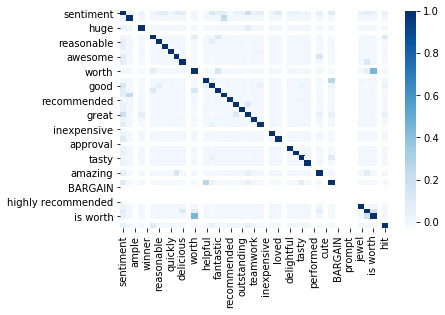

In [121]:
sns.heatmap(sentiment_raw.corr(), cmap="Blues")

In [122]:
data = sentiment_raw[keywords]
data.sample(5)

,generous,ample,huge,winner,definitely,reasonable,tender,quickly,awesome,delicious,...,unreal,great,prompt,highly recommended,jewel,love,is worth,sticks around,loved,hit
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
target = sentiment_raw['sentiment']
target.head(10)

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    1
Name: sentiment, dtype: int64

In [125]:
xmsg, y, z = run_Bernoulli_supervised_learning()

In [126]:
print("xmsg={}, y={}, z={}".format(xmsg, y, z))

xmsg=Number of mislabeled points out of a total 1000 points : 358, y=1000, z=358
